# Global GDP per Capita Analysis
# An analysis of global GDP per capita trends and country-level comparisons



**Project Goal:**  
For this project, I am sourcing GDP per capita (current US$) data from the World Bank's World Development Indicators database. 
The goal for Week 1 Day 1 is to load the dataset, inspect its structure, and make sure it is ready for cleaning and analysis in the next steps.

**Cell Objective:**  
This cell imports pandas, loads the GDP per capita CSV file into a DataFrame, and inspects the first rows, shape, and columns to understand the dataset structure.


In [1]:
# Step 1: Import pandas library
import pandas as pd

# Step 2: Load the GDP per capita CSV file into a pandas DataFrame
gdp_data = pd.read_csv('../data/world_bank_gdp_per_capita.csv')

# Step 3: Display the first 5 rows to inspect the data
gdp_data.head()




,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,174.930991430166,138.706821676113,178.954088379235,198.871115728727,221.763653873013,254.184249149336,...,565.569730408751,522.082215583898,525.469770891619,491.337221382603,496.6025042585,510.787063366811,356.496214115892,357.261152798144,413.757894705303,..
1,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,1160.42047054038,1326.41652388077,1479.83884572006,1908.69900687608,2446.90949947798,2741.72136549578,...,4199.53912925398,4457.63412207495,5006.36012951959,5897.65452588774,6069.43903131027,6027.91350716348,7242.45513146613,7756.96188744253,9730.86921906893,11377.7757431099
2,Algeria,DZA,GDP per capita (current US$),NY.GDP.PCAP.CD,1772.92869122761,1896.30020878013,1937.46411413019,2283.77299346126,2816.99384960555,3233.13339634212,...,4685.05902729002,4424.98529027556,4554.66753957828,4577.21029180491,4468.45341883656,3743.5419522929,4160.55926736925,4960.30334332888,5370.477235078,5752.99076651465
3,American Samoa,ASM,GDP per capita (current US$),NY.GDP.PCAP.CD,..,..,8972.69636535698,9197.66196836987,8958.42866697173,8831.26975996609,...,12727.4102651386,12843.3342903627,11863.6839452565,12552.0546868861,12886.1359517218,14489.2586563775,15236.1604875571,18017.4589383973,..,..
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,21810.2503808666,23511.2969500881,26528.1300628236,34063.575598394,39021.1107100919,40829.8116399538,...,38654.95287916,40129.8385811474,40672.9717424447,42819.7577456133,41257.816459345,37361.1070081615,42425.7066454357,42414.0479861228,46812.4261013102,49303.6491674336


In [2]:
# Step 4: Optional - check the shape of the dataset (rows, columns)
print("Dataset shape:", gdp_data.shape)

Dataset shape: (222, 29)


In [3]:
# Step 5: Optional - see the column names
print("Columns:", gdp_data.columns.tolist())

Columns: ['Country Name', 'Country Code', 'Series Name', 'Series Code', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]']


## Data Cleaning and Preparation


**Objective:**  
Prepare the World Bank GDP per capita dataset for analysis by cleaning the data, handling missing values, and reshaping it into a tidy long format suitable for time-series analysis and visualization.

**Key Steps Performed:**
- Assessed missing values in the dataset  
- Removed unnecessary indicator columns  
- Reshaped the data from wide to long format  
- Standardized column names  
- Converted data types for analysis  
- Saved a cleaned, analysis-ready dataset  

In [4]:
import pandas as pd
gdp_data = pd.read_csv('../data/world_bank_gdp_per_capita.csv')


In [5]:
# checking for missing values.
gdp_data.isna().sum().head()

Country Name     3
Country Code     5
Series Name      5
Series Code      5
2000 [YR2000]    5
dtype: int64

In [6]:
# dropping unnecesary columns.
gdp_data_clean = gdp_data.drop(columns=['Series Name', 'Series Code'])

In [7]:
# reshaping the dataset from wide into (tidy)long format using pandas melt making it suitable for time-series analysis.
gdp_long = gdp_data_clean.melt(
    id_vars=['Country Name', 'Country Code'],
    var_name='year',
    value_name='gdp_per_capita'
)

In [8]:
# renaming the columns name
gdp_long.columns = [
    'country',
    'country_code',
    'year',
    'gdp_per_capita'
]


In [9]:
# converting the data types because Years must be numeric for filtering/plotting and GDP for analysis
gdp_long['year'] = gdp_long['year'].str.extract('(\d{4})')
gdp_long['year'] = gdp_long['year'].astype(int)

gdp_long['gdp_per_capita'] = pd.to_numeric(gdp_long['gdp_per_capita'], errors='coerce')


In [10]:
# dropping rows with missing GDP
gdp_long = gdp_long.dropna(subset=['gdp_per_capita'])


In [11]:
# checking the cleaned data
print(gdp_long.head())
print("Cleaned dataset shape:", gdp_long.shape)

       country country_code  year  gdp_per_capita
0  Afghanistan          AFG  2000      174.930991
1      Albania          ALB  2000     1160.420471
2      Algeria          DZA  2000     1772.928691
4      Andorra          AND  2000    21810.250381
5       Angola          AGO  2000      563.733796
Cleaned dataset shape: (5233, 4)


In [12]:
# saving the cleaned dataset
gdp_long.to_csv(
    '../data/world_bank_gdp_per_capita_clean.csv',
    index=False)

## Exploratory Data Analysis


### Objective
The goal of this step is to explore the cleaned World Bank GDP per capita dataset in order to:
- Understand global income trends over time
- Compare income levels across countries
- Identify broad patterns and disparities in economic development

### Analysis Approach
- Load the cleaned dataset produced in Day 2
- Examine dataset coverage across years and countries
- Aggregate GDP per capita by year to analyze global trends
- Compare countries using rankings and visualizations


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

gdp_clean = pd.read_csv('../data/world_bank_gdp_per_capita_clean.csv')
gdp_clean.head()


,country,country_code,year,gdp_per_capita
0,Afghanistan,AFG,2000,174.930991
1,Albania,ALB,2000,1160.420471
2,Algeria,DZA,2000,1772.928691
3,Andorra,AND,2000,21810.250381
4,Angola,AGO,2000,563.733796


In [14]:
# understand the data size and coverage
print("Shape:", gdp_clean.shape)
print("Years range:", gdp_clean['year'].min(), "-", gdp_clean['year'].max())
print("Number of countries:", gdp_clean['country'].nunique())


Shape: (5233, 4)
Years range: 2000 - 2024
Number of countries: 214


In [15]:
# Compute global average per year
global_trend = (
    gdp_clean
    .groupby('year')['gdp_per_capita']
    .mean()
    .reset_index()
)


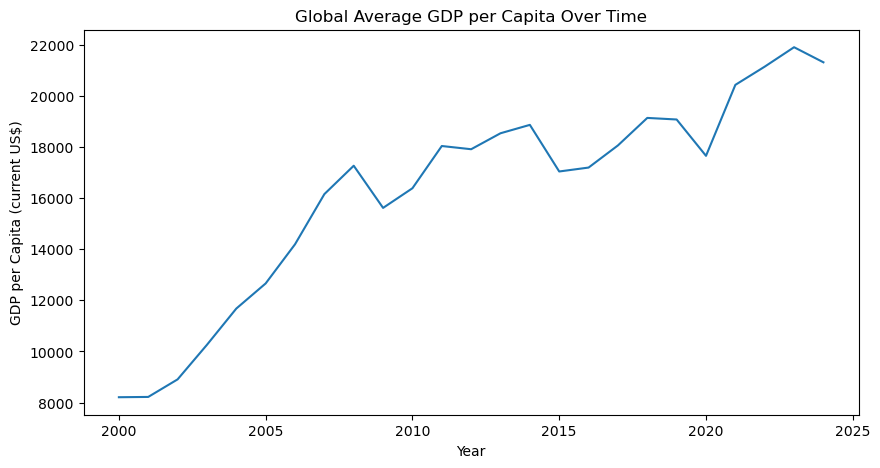

In [16]:
# Plotting the trend
plt.figure(figsize=(10, 5))
plt.plot(global_trend['year'], global_trend['gdp_per_capita'])
plt.title('Global Average GDP per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (current US$)')
plt.show()


In [17]:
# comparing countries (Top 10 countries by GDP per capita (latest year))
latest_year = gdp_clean['year'].max()

top_countries = (
    gdp_clean[gdp_clean['year'] == latest_year]
    .sort_values('gdp_per_capita', ascending=False)
    .head(10)
)

top_countries[['country', 'gdp_per_capita']]


,country,gdp_per_capita
5156,Monaco,288001.433369
5060,Bermuda,142855.374714
5142,Luxembourg,137781.681659
5123,Ireland,112894.953241
5209,Switzerland,103998.186686
5194,Singapore,90674.066633
5172,Norway,86785.433449
5118,Iceland,86040.530985
5224,United States,84534.040784
5183,Qatar,76688.694174


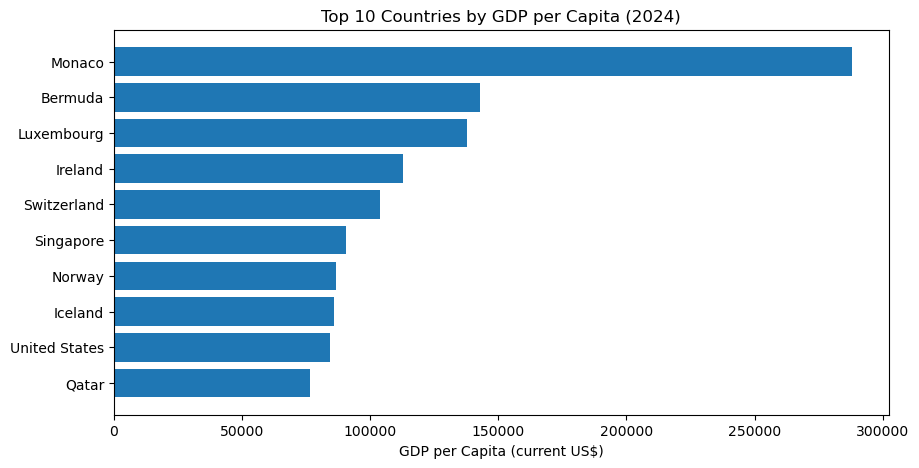

In [18]:
plt.figure(figsize=(10, 5))
plt.barh(top_countries['country'], top_countries['gdp_per_capita'])
plt.xlabel('GDP per Capita (current US$)')
plt.title(f'Top 10 Countries by GDP per Capita ({latest_year})')
plt.gca().invert_yaxis()
plt.show()


## EDA Summary

- Global average GDP per capita increases over time, indicating long-term income growth at the global level.
- The trend is uneven, with periods of slower growth rather than a smooth increase.
- GDP per capita varies widely across countries, with high-income economies consistently ranking at the top.


## Initial Findings


This project analyzed global GDP per capita trends using World Bank data. 
The workflow covered data sourcing, cleaning, reshaping, and exploratory analysis. 
The results highlight long-term global growth alongside persistent differences 
between countries. This analysis establishes a solid foundation for deeper 
economic or regional exploration.


## Code Refactoring and Reusability

In this section, I refactor the earlier exploratory analysis into reusable Python functions. 
This improves readability, reduces repetition, and makes the analysis easier to extend.


In [19]:
import pandas as pd

In [20]:
def load_gdp_data(filepath):
    """
    Load World Bank GDP per capita data from a CSV file.

    Parameters:
        filepath (str): Path to the CSV file

    Returns:
        pd.DataFrame: Loaded GDP data
    """
    return pd.read_csv(filepath)

In [21]:
def inspect_dataframe(df):
    """
    Print basic information about a DataFrame for quick inspection.
    """
    print("Shape:", df.shape)
    print("\nColumns:")
    print(df.columns)
    print("\nMissing values:")
    print(df.isna().sum())


In [22]:
gdp_data = load_gdp_data('../data/world_bank_gdp_per_capita.csv')
inspect_dataframe(gdp_data)


Shape: (222, 29)

Columns:
Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
       '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]',
       '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]',
       '2024 [YR2024]'],
      dtype='object')

Missing values:
Country Name     3
Country Code     5
Series Name      5
Series Code      5
2000 [YR2000]    5
2001 [YR2001]    5
2002 [YR2002]    5
2003 [YR2003]    5
2004 [YR2004]    5
2005 [YR2005]    5
2006 [YR2006]    5
2007 [YR2007]    5
2008 [YR2008]    5
2009 [YR2009]    5
2010 [YR2010]    5
2011 [YR2011]    5
2012 [YR2012]    5
2013 [YR2013]    5
2014 [YR2014]    5
2015 [YR2015]    5
2016 [YR20

In [23]:
def clean_column_names(df):
    """
    Standardize column names to lowercase and replace spaces with underscores.
    """
    df = df.copy()
    df.columns = (
        df.columns
        .str.lower()
        .str.replace(' ', '_')
    )
    return df


In [24]:
gdp_data = clean_column_names(gdp_data)


### Rationale for Reusable Functions

Refactoring repeated logic into functions makes the analysis more readable, reusable, and less error-prone.
This approach aligns with how data analysis is performed in production environments.


## Data Inspection and Validation


**Objective:**  
Check and validate the dataset structure using a reusable function. This ensures the data is ready for analysis.


In [25]:
import pandas as pd
def inspect_dataframe(df):
    """
    Inspect a DataFrame for:
    - Shape (rows x columns)
    - Column names
    - Missing values
    """
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Missing values per column:")
    print(df.isna().sum())


In [26]:
inspect_dataframe(gdp_data)

Shape: (222, 29)
Columns: ['country_name', 'country_code', 'series_name', 'series_code', '2000_[yr2000]', '2001_[yr2001]', '2002_[yr2002]', '2003_[yr2003]', '2004_[yr2004]', '2005_[yr2005]', '2006_[yr2006]', '2007_[yr2007]', '2008_[yr2008]', '2009_[yr2009]', '2010_[yr2010]', '2011_[yr2011]', '2012_[yr2012]', '2013_[yr2013]', '2014_[yr2014]', '2015_[yr2015]', '2016_[yr2016]', '2017_[yr2017]', '2018_[yr2018]', '2019_[yr2019]', '2020_[yr2020]', '2021_[yr2021]', '2022_[yr2022]', '2023_[yr2023]', '2024_[yr2024]']
Missing values per column:
country_name     3
country_code     5
series_name      5
series_code      5
2000_[yr2000]    5
2001_[yr2001]    5
2002_[yr2002]    5
2003_[yr2003]    5
2004_[yr2004]    5
2005_[yr2005]    5
2006_[yr2006]    5
2007_[yr2007]    5
2008_[yr2008]    5
2009_[yr2009]    5
2010_[yr2010]    5
2011_[yr2011]    5
2012_[yr2012]    5
2013_[yr2013]    5
2014_[yr2014]    5
2015_[yr2015]    5
2016_[yr2016]    5
2017_[yr2017]    5
2018_[yr2018]    5
2019_[yr2019]    5
202

## Data Validation


This section focuses on validating the GDP per capita dataset before further analysis.  
I added checks to confirm required columns are present, identify missing values, and ensure the data is reliable for reuse in analysis and visualization.


In [27]:
def validate_gdp_data(df):
    """
    Validate GDP per capita dataset structure and quality.
    """
    required_columns = {'country', 'country_code', 'year', 'gdp_per_capita'}
    
    missing_columns = required_columns - set(df.columns)
    if missing_columns:
        raise ValueError(f"Missing required columns: {missing_columns}")
    
    if df['year'].isna().any():
        raise ValueError("Year column contains missing values")
    
    if df['gdp_per_capita'].isna().any():
        print("Warning: GDP per capita contains missing values")
    
    return True


In [28]:
validate_gdp_data(gdp_long)


True

In [29]:
gdp_long.describe()


,year,gdp_per_capita
count,5233.000000,5233.000000
mean,2011.975349,16235.440013
std,7.155864,25232.287409
min,2000.000000,109.593814
25%,2006.000000,1573.552199
50%,2012.000000,5527.515273
75%,2018.000000,21286.838864
max,2024.000000,288001.433369


In [30]:
gdp_long['year'].min(), gdp_long['year'].max()


(2000, 2024)

## Reproducible Data Pipeline


I consolidated the full data preparation process into a single function that loads, cleans, reshapes, and validates the dataset.  
This ensures consistent data quality and makes the analysis reproducible.


In [31]:
def validate_gdp_data(df):
    required_columns = {
        'country_name',
        'country_code',
        'year',
        'gdp_per_capita'
    }

    missing = required_columns - set(df.columns)
    if missing:
        raise ValueError(f"Missing required columns: {missing}")

    if df['year'].isna().any():
        raise ValueError("Year column contains missing values")

    return True


In [32]:
def prepare_gdp_dataset(filepath):
    """Prepare World Bank GDP per capita data for analysis."""
   
    # Load raw data
    df = load_gdp_data(filepath)

    # Standardize column names
    df = clean_column_names(df)

    # Drop unnecessary metadata columns if present
    drop_cols = ['series_name', 'series_code']
    df = df.drop(columns=[c for c in drop_cols if c in df.columns])

    # Reshape from wide to long format
    df_long = df.melt(
        id_vars=['country_name', 'country_code'],
        var_name='year',
        value_name='gdp_per_capita'
    )

    # Clean year column
    df_long['year'] = df_long['year'].str.extract('(\d{4})').astype(int)

    # Convert GDP values to numeric
    df_long['gdp_per_capita'] = pd.to_numeric(
        df_long['gdp_per_capita'], errors='coerce'
    )

    # Validate final dataset
    validate_gdp_data(df_long)

    return df_long

In [33]:
gdp_final = prepare_gdp_dataset('../data/world_bank_gdp_per_capita.csv')
gdp_final.head()

,country_name,country_code,year,gdp_per_capita
0,Afghanistan,AFG,2000,174.930991
1,Albania,ALB,2000,1160.420471
2,Algeria,DZA,2000,1772.928691
3,American Samoa,ASM,2000,NaN
4,Andorra,AND,2000,21810.250381


In [34]:
print(gdp_final.shape)


(5550, 4)


In [35]:
gdp_final = prepare_gdp_dataset('../data/world_bank_gdp_per_capita.csv')


In [36]:
gdp_final.sort_values(
    by='gdp_per_capita',
    ascending=False
).head(10)


,country_name,country_code,year,gdp_per_capita
5458,Monaco,MCO,2024,288001.433369
5236,Monaco,MCO,2023,256799.788613
5014,Monaco,MCO,2022,226052.001905
4792,Monaco,MCO,2021,223823.363960
5220,Liechtenstein,LIE,2023,206780.590353
1906,Monaco,MCO,2008,204263.797114
4776,Liechtenstein,LIE,2021,201944.830335
3238,Monaco,MCO,2014,195693.570739
4348,Monaco,MCO,2019,193746.785647
4126,Monaco,MCO,2018,188298.315668


Dataset Ready for Analysis

The GDP per capita dataset is now prepared using reusable and validated functions.
The resulting dataset (gdp_final) can be directly used for analysis and visualization without additional preprocessing.

## Analytical Questions

The purpose of this section is to define clear analytical questions that will guide the GDP per capita analysis.

### Research Questions

- How has global GDP per capita changed over time?
- Are there clear differences in GDP per capita trends across countries?
- Which countries consistently rank highest and lowest by GDP per capita?
- Are there periods of stagnation or decline that may reflect global economic events?



In [37]:
gdp_final = prepare_gdp_dataset('../data/world_bank_gdp_per_capita.csv')


In [38]:
gdp_final[['year', 'gdp_per_capita']].describe()


,year,gdp_per_capita
count,5550.000000,5233.000000
mean,2012.000000,16235.440013
std,7.211752,25232.287409
min,2000.000000,109.593814
25%,2006.000000,1573.552199
50%,2012.000000,5527.515273
75%,2018.000000,21286.838864
max,2024.000000,288001.433369


## GDP per Capita Trends

This section explores patterns and trends in GDP per capita using the prepared dataset.  
The focus is on understanding long-term trends and cross-country differences.


In [39]:
gdp_final = prepare_gdp_dataset('../data/world_bank_gdp_per_capita.csv')
gdp_final.head()


,country_name,country_code,year,gdp_per_capita
0,Afghanistan,AFG,2000,174.930991
1,Albania,ALB,2000,1160.420471
2,Algeria,DZA,2000,1772.928691
3,American Samoa,ASM,2000,NaN
4,Andorra,AND,2000,21810.250381


In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Global Average GDP per Capita Over Time'}, xlabel='year'>

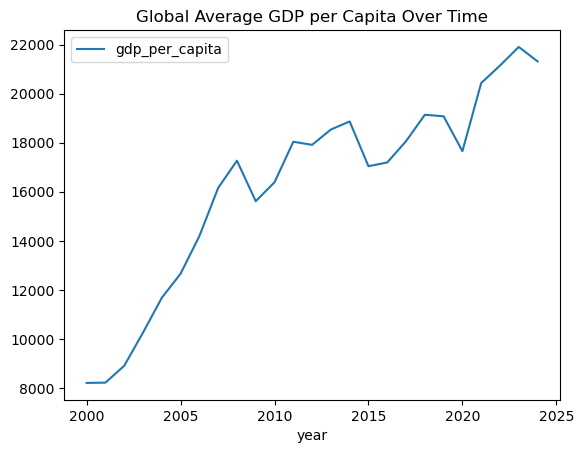

In [41]:
### Analytical Question 1 — Global trend
### How has global GDP per capita evolved over time?


global_trend = (
    gdp_final
    .groupby('year')['gdp_per_capita']
    .mean()
    .reset_index()
)

global_trend.plot(
    x='year',
    y='gdp_per_capita',
    title='Global Average GDP per Capita Over Time'
)



<AxesSubplot:title={'center':'GDP per Capita Comparison: Selected Countries'}, xlabel='year'>

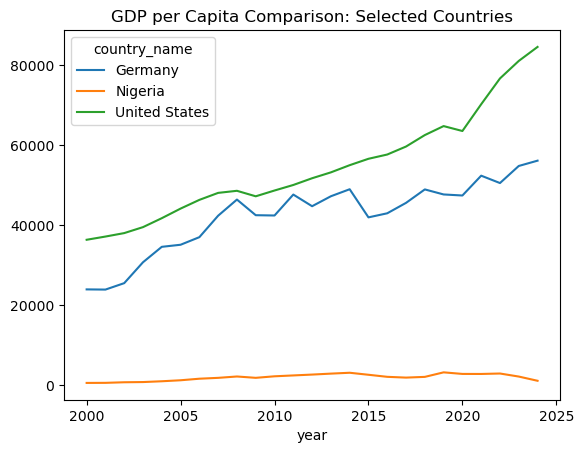

In [42]:
### Analytical Question 2 — Country comparison
### How do selected countries compare over time?


countries = ['United States', 'Germany', 'Nigeria']

country_trend = gdp_final[gdp_final['country_name'].isin(countries)]

country_trend.pivot(
    index='year',
    columns='country_name',
    values='gdp_per_capita'
).plot(
    title='GDP per Capita Comparison: Selected Countries'
)


### Key Observations

- Global GDP per capita shows a steady upward trend over time, with noticeable slowdowns during major economic disruptions.
- There are large and persistent gaps between high-income and lower-income countries.
- While all selected countries show growth, the pace and scale differ significantly.


## Quantifying Growth and Relative Performance

The analysis is extended by examining growth rates and relative rankings.
The goal is to summarize how GDP per capita has changed over time and how countries compare in relative position.


In [43]:
# Ensure data is sorted
gdp_sorted = gdp_final.sort_values('year')

# Global average GDP per capita by year
global_gdp = (
    gdp_sorted
    .groupby('year', as_index=False)['gdp_per_capita']
    .mean()
)

start_value = global_gdp.iloc[0]['gdp_per_capita']
end_value = global_gdp.iloc[-1]['gdp_per_capita']

global_growth_pct = (end_value / start_value - 1) * 100
global_growth_pct


159.5952892205417

Global GDP per capita increased substantially over the observed period.
While growth was not uniform across all years, the long-term trend reflects sustained economic expansion.


In [44]:
country_growth = (
    gdp_sorted[gdp_sorted['country_name'].isin(countries)]
    .groupby('country_name')
    .agg(
        start_gdp=('gdp_per_capita', 'first'),
        end_gdp=('gdp_per_capita', 'last')
    )
)

country_growth['growth_pct'] = (
    (country_growth['end_gdp'] / country_growth['start_gdp'] - 1) * 100
)

country_growth.sort_values('growth_pct', ascending=False)


,start_gdp,end_gdp,growth_pct
country_name,,,
Germany,23925.855990,56103.732318,134.489969
United States,36329.956073,84534.040784,132.684126
Nigeria,547.318299,1084.160418,98.085907


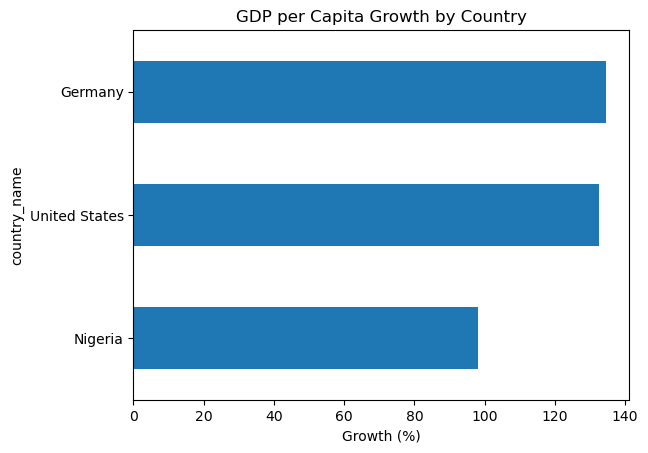

In [45]:
country_growth['growth_pct'].sort_values().plot(
    kind='barh',
    title='GDP per Capita Growth by Country'
)
plt.xlabel('Growth (%)')
plt.show()


In [46]:
start_year = gdp_sorted['year'].min()
end_year = gdp_sorted['year'].max()

rank_start = (
    gdp_sorted[gdp_sorted['year'] == start_year]
    .sort_values('gdp_per_capita', ascending=False)
    .assign(rank_start=lambda df: range(1, len(df) + 1))
    [['country_name', 'rank_start']]
)

rank_end = (
    gdp_sorted[gdp_sorted['year'] == end_year]
    .sort_values('gdp_per_capita', ascending=False)
    .assign(rank_end=lambda df: range(1, len(df) + 1))
    [['country_name', 'rank_end']]
)

rank_change = (
    rank_start
    .merge(rank_end, on='country_name', how='inner')
    .assign(rank_change=lambda df: df['rank_start'] - df['rank_end'])
    .sort_values('rank_change', ascending=False)
)

rank_change.head(10)


,country_name,rank_start,rank_end,rank_change
218,Sint Maarten (Dutch part),213,30,183
205,Turks and Caicos Islands,206,36,170
225,Kosovo,220,105,115
139,Guyana,140,46,94
170,Moldova,171,102,69
156,Armenia,157,93,64
135,Serbia,136,77,59
167,Mongolia,168,109,59
136,China,137,80,57
145,Georgia,146,92,54


## Key Takeaways

- Global GDP per capita increased steadily over the observed period, despite periods of slower growth.
- All selected countries experienced growth, though the magnitude and pace differed substantially.
- Relative country rankings remain largely stable, suggesting persistent income gaps with limited convergence.
